In [2]:
def remove_outliers_zscore(df, column_name, threshold=3):
    # Статистические показатели до удаления выбросов
    stats_before = {
        'mean': df[column_name].mean(),
        'min': df[column_name].min(),
        'max': df[column_name].max(),
        '25%': df[column_name].quantile(0.25),
        '75%': df[column_name].quantile(0.75)
    }

    # Вычисление среднего значения и стандартного отклонения столбца
    mean = df[column_name].mean(skipna=True)
    std = df[column_name].std(skipna=True)

    # Вычисление z-оценки для каждого значения в столбце
    z_scores = np.abs((df[column_name] - mean) / std)

    # Удаление строк, в которых абсолютное значение z-оценки превышает порог, оставляя пропуски без изменений
    df_no_outliers = df[(z_scores <= threshold) | df[column_name].isna()]

    # Статистические показатели после удаления выбросов
    stats_after = {
        'mean': df_no_outliers[column_name].mean(),
        'min': df_no_outliers[column_name].min(),
        'max': df_no_outliers[column_name].max(),
        '25%': df_no_outliers[column_name].quantile(0.25),
        '75%': df_no_outliers[column_name].quantile(0.75)
    }

    # Количество удаленных строк с выбросами
    num_outliers = len(df) - len(df_no_outliers)
    print("В столбце: ", column_name)
    print("Количество удаленных строк с выбросами:", num_outliers)
    print("Статистика до удаления выбросов:")
    print(stats_before)
    print("Статистика после удаления выбросов:")
    print(stats_after)

    return df_no_outliers


def print_missing_values_stats(df):
    na_counts_by_column = df.isna().sum()
    print("Количество пропущенных значений по столбцам:")
    print(na_counts_by_column)


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
original_data_filtered = pd.read_parquet('data/original_data_filtered.parquet')
# Удаление выбросов в нескольких столбцах
int_regressor_columns =  [' Активы  всего, RUB',
                          ' Выручка, RUB', ' Коэффициент абсолютной ликвидности, %',
                          ' Коэффициент быстрой ликвидности, %',
                          ' Коэффициент обеспеченности собственными оборотными средствами, %',
                          ' Коэффициент соотношения заемных и собственных средств, %',
                          ' Коэффициент текущей ликвидности, %',
                          ' Краткосрочные обязательства, RUB', ' Кредиторская задолженность, RUB',
                          ' Нераспределенная прибыль (непокрытый убыток), RUB',
                          ' Период оборота активов, дни',
                          ' Период погашения дебиторской задолженности, дни',
                          ' Период погашения кредиторской задолженности, дни',
                          ' Рентабельность активов (ROA), %', ' Рентабельность затрат, %',
                          ' Рентабельность капитала (ROE), %', ' Рентабельность продаж, %',
                          ' Себестоимость продаж, RUB']
original_data_filtered

,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период погашения дебиторской задолженности, дни","Период погашения кредиторской задолженности, дни","Рентабельность активов (ROA), %","Рентабельность затрат, %","Рентабельность капитала (ROE), %","Рентабельность продаж, %","Себестоимость продаж, RUB","Собственный оборотный капитал, RUB","Соотношение чистого долга к капиталу, %",Категориальная переменная
0,0,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,49.0,48.21,0.7014,0.1629,2.4167,0.1401,2775000.0,342000.0,-0.1538,False
1,1,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,93.0,93.43,-0.2829,0.0225,-1.0439,0.0220,2096000.0,98000.0,-0.2653,False
2,2,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,80.0,144.05,0.0308,0.0483,0.2192,0.0460,1699000.0,121000.0,-3.1488,False
3,3,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,23.0,29.73,0.5661,0.0843,1.7658,0.0777,26989000.0,1954000.0,-0.1464,False
4,4,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,147.0,173.59,0.0248,0.0130,0.0744,0.0129,8440000.0,2205000.0,-0.0542,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77276,77276,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,99.0,270.34,0.0062,-0.0667,0.5051,-0.0715,538535000.0,-106245000.0,-5.6802,False
77277,77277,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,82.0,180.63,0.0122,0.0174,1.3191,0.0171,475278000.0,-26689000.0,-56.7717,False
77278,77278,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,51.0,75.47,0.0045,0.0037,0.8367,0.0037,572141000.0,24473000.0,2.7856,False
77279,77279,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,78.0,68.78,0.0355,-0.0295,1.1948,-0.0304,275635000.0,25007000.0,-4.5800,False


In [4]:
# # Преобразование столбцов "Дата иска" и "Год" в формат даты
# original_data_filtered['Дата иска'] = pd.to_datetime(original_data_filtered['Дата иска'], format='%Y-%m-%d')
# # Вычисление года, вычитая 2 из года в столбце "Дата иска"
# original_data_filtered['Год иска'] = original_data_filtered['Дата иска'].dt.year - 2
# 
# # Оставление только строк, где год в столбце "Год иска" совпадает с годом в столбце "Год" в original_data_filtered
# df_filtered = original_data_filtered[original_data_filtered['Год иска'] == original_data_filtered['Год']]
# 
# # Удаление временного столбца "Год иска"
# df_filtered = df_filtered.drop(columns=['Год иска'])
# df_filtered

,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период погашения дебиторской задолженности, дни","Период погашения кредиторской задолженности, дни","Рентабельность активов (ROA), %","Рентабельность затрат, %","Рентабельность капитала (ROE), %","Рентабельность продаж, %","Себестоимость продаж, RUB","Собственный оборотный капитал, RUB","Соотношение чистого долга к капиталу, %",Категориальная переменная


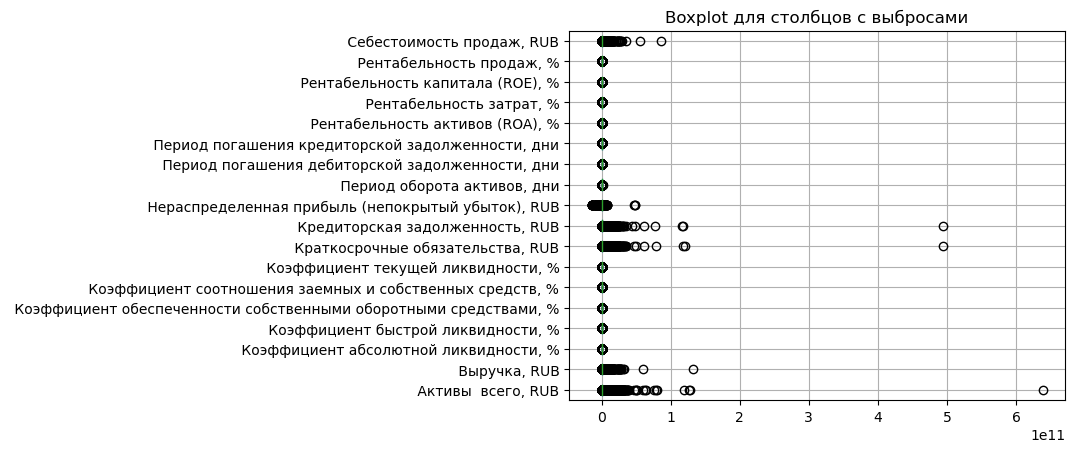

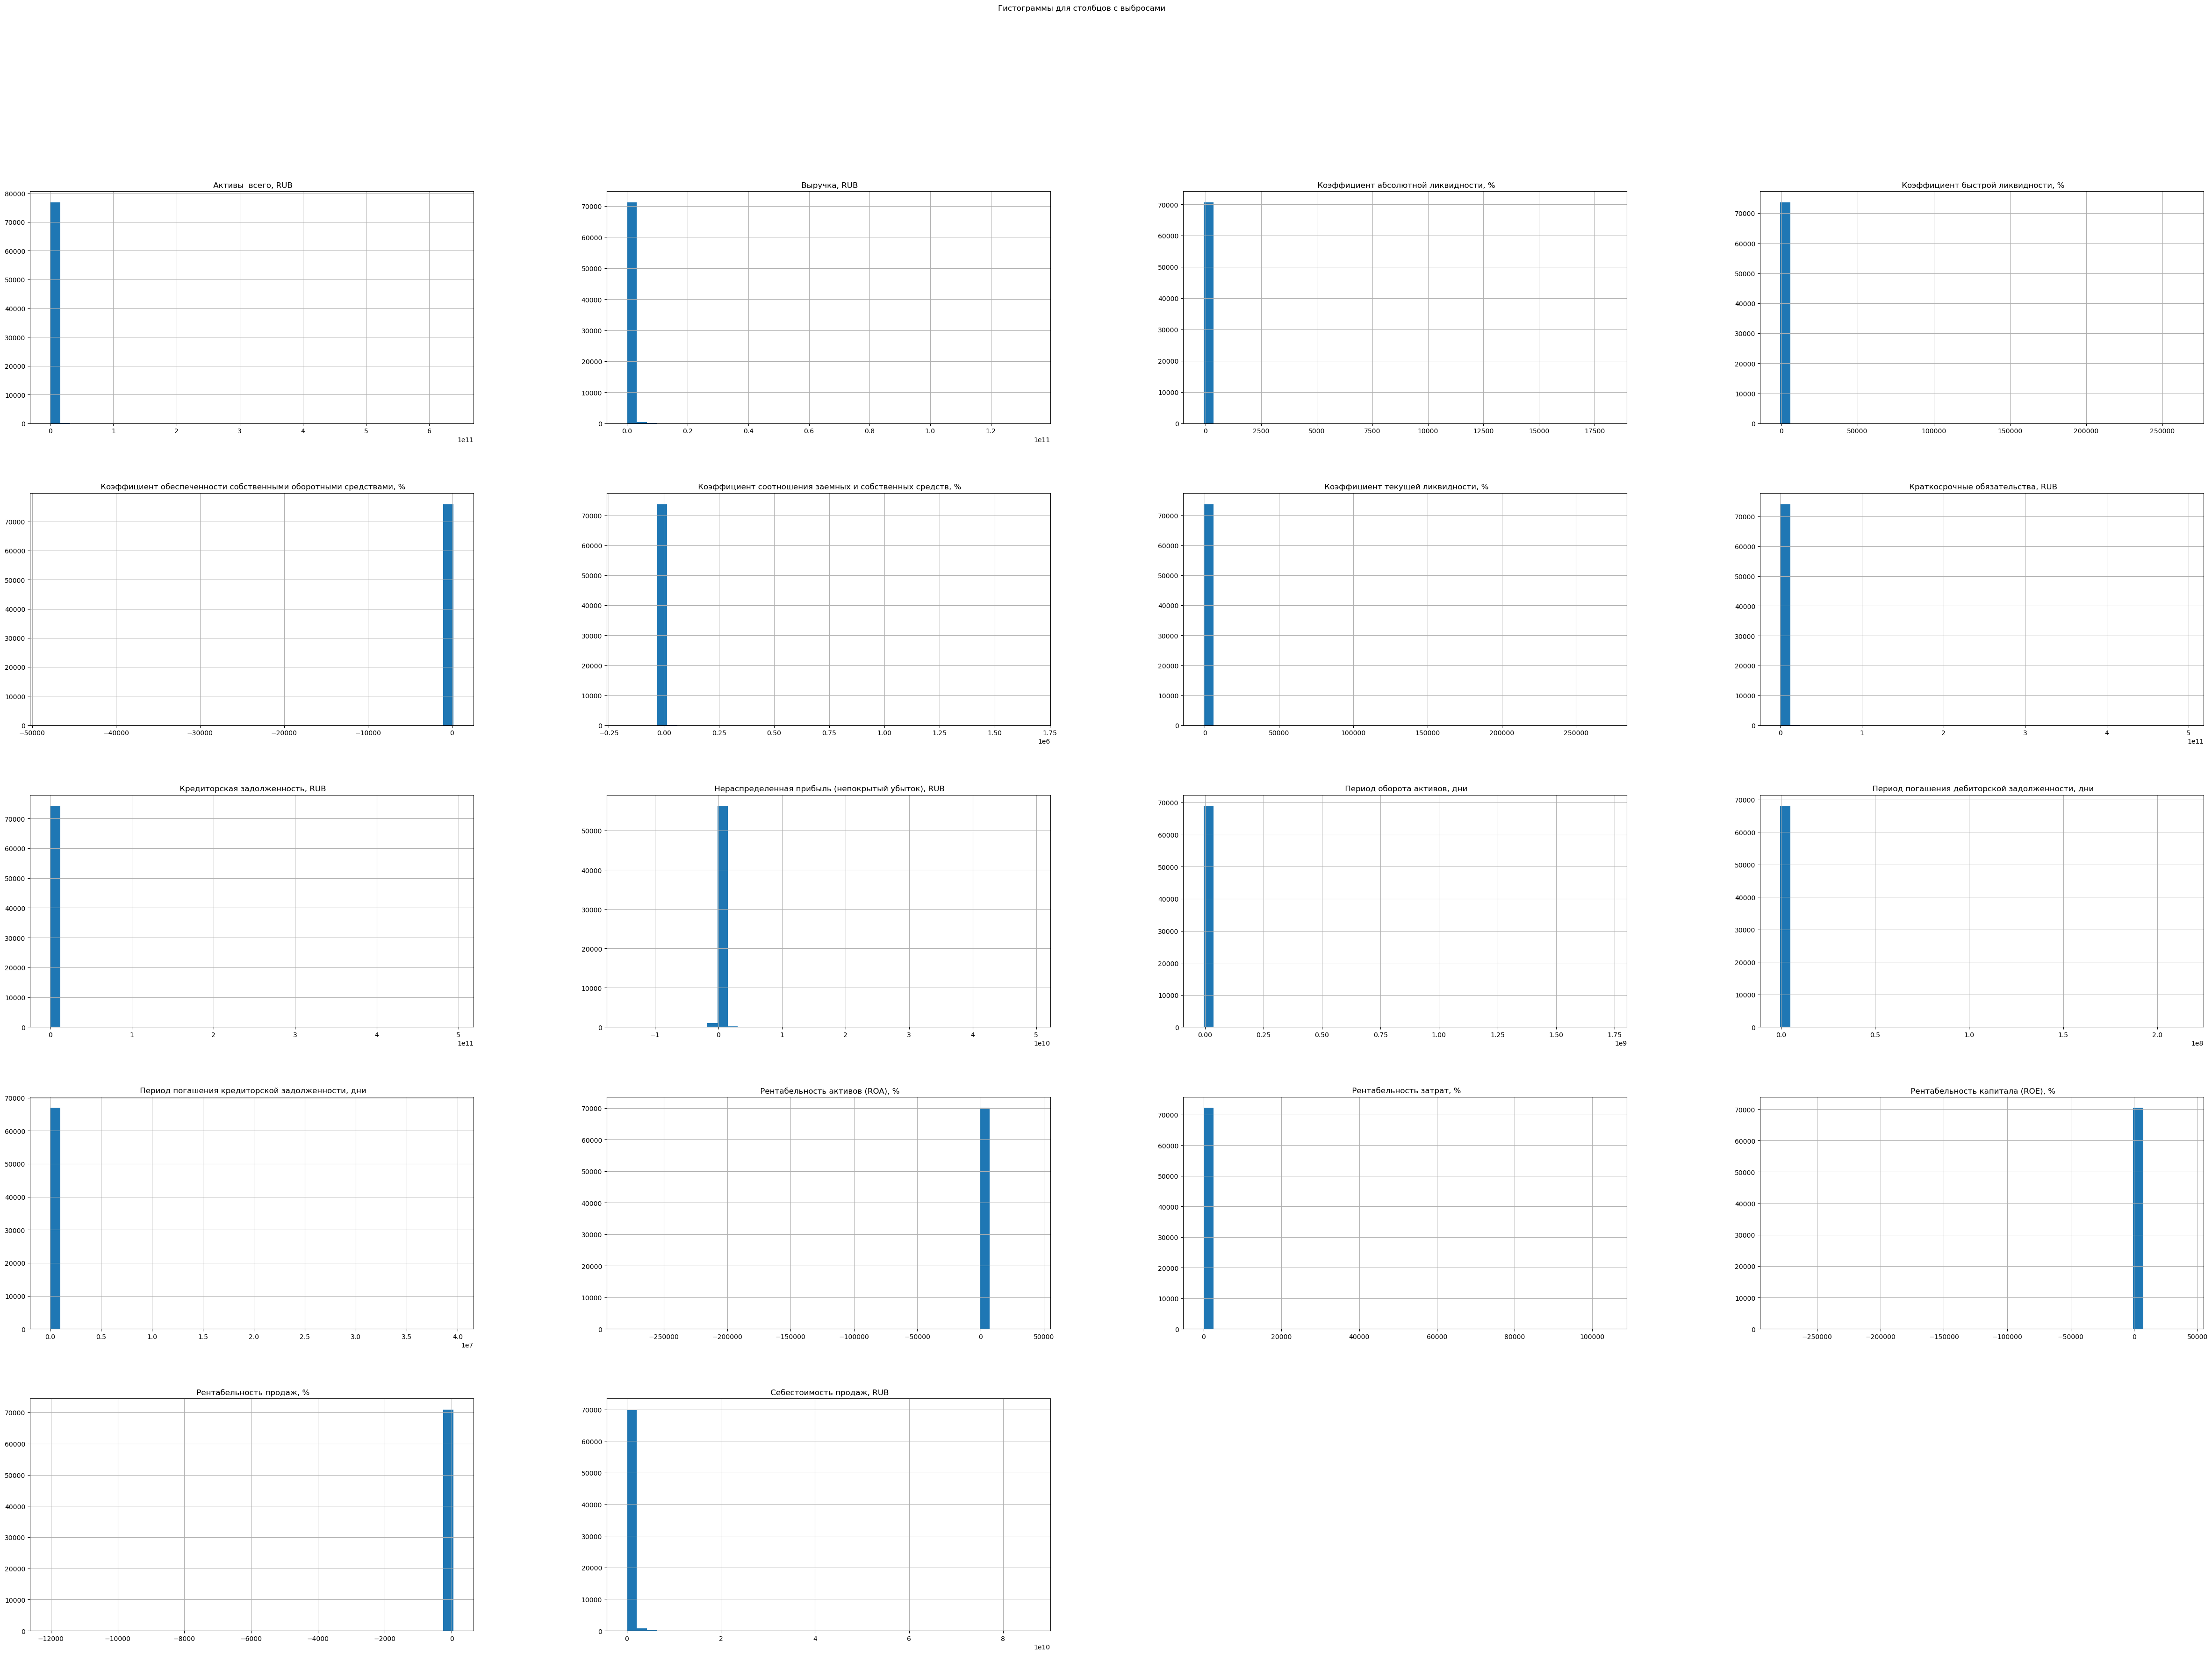

In [36]:
# Построение boxplot для каждого столбца
original_data_filtered.boxplot(column=int_regressor_columns, vert=False)
plt.title('Boxplot для столбцов с выбросами')
plt.show()

# Построение гистограммы для каждого столбца
original_data_filtered[int_regressor_columns].hist(bins=40, figsize=(60, 40))
plt.suptitle('Гистограммы для столбцов с выбросами')
plt.show()

In [37]:
df = original_data_filtered

for column in columns_to_remove_outliers:
    df = remove_outliers_zscore(df, column, threshold=3)



В столбце:   Активы  всего, RUB
Количество удаленных строк с выбросами: 413
Статистика до удаления выбросов:
{'mean': 476075703.64915353, 'min': -47905000.0, 'max': 638387100000.0, '25%': 32573000.0, '75%': 330468250.0}
Статистика после удаления выбросов:
{'mean': 371795474.86376035, 'min': -47905000.0, 'max': 9292811000.0, '25%': 32261500.0, '75%': 323147500.0}
В столбце:   Выручка, RUB
Количество удаленных строк с выбросами: 1016
Статистика до удаления выбросов:
{'mean': 343090593.4853586, 'min': -79861000.0, 'max': 59688542000.0, '25%': 64201000.0, '75%': 373588500.0}
Статистика после удаления выбросов:
{'mean': 292221704.67828274, 'min': -79861000.0, 'max': 2288896000.0, '25%': 62865500.0, '75%': 357386500.0}
В столбце:   Коэффициент абсолютной ликвидности, %
Количество удаленных строк с выбросами: 54
Статистика до удаления выбросов:
{'mean': 1.4675742062117538, 'min': -89.3309, 'max': 18045.9286, '25%': 0.0166, '75%': 0.304025}
Статистика после удаления выбросов:
{'mean': 0.615373

In [38]:
df

,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период погашения дебиторской задолженности, дни","Период погашения кредиторской задолженности, дни","Рентабельность активов (ROA), %","Рентабельность затрат, %","Рентабельность капитала (ROE), %","Рентабельность продаж, %","Себестоимость продаж, RUB","Собственный оборотный капитал, RUB","Соотношение чистого долга к капиталу, %",Категориальная переменная
0,0,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,49.0,48.21,0.7014,0.1629,2.4167,0.1401,2775000.0,342000.0,-0.1538,False
1,1,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,93.0,93.43,-0.2829,0.0225,-1.0439,0.0220,2096000.0,98000.0,-0.2653,False
2,2,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,80.0,144.05,0.0308,0.0483,0.2192,0.0460,1699000.0,121000.0,-3.1488,False
3,3,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,23.0,29.73,0.5661,0.0843,1.7658,0.0777,26989000.0,1954000.0,-0.1464,False
4,4,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,147.0,173.59,0.0248,0.0130,0.0744,0.0129,8440000.0,2205000.0,-0.0542,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77276,77276,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,99.0,270.34,0.0062,-0.0667,0.5051,-0.0715,538535000.0,-106245000.0,-5.6802,False
77277,77277,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,82.0,180.63,0.0122,0.0174,1.3191,0.0171,475278000.0,-26689000.0,-56.7717,False
77278,77278,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,51.0,75.47,0.0045,0.0037,0.8367,0.0037,572141000.0,24473000.0,2.7856,False
77279,77279,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,78.0,68.78,0.0355,-0.0295,1.1948,-0.0304,275635000.0,25007000.0,-4.5800,False


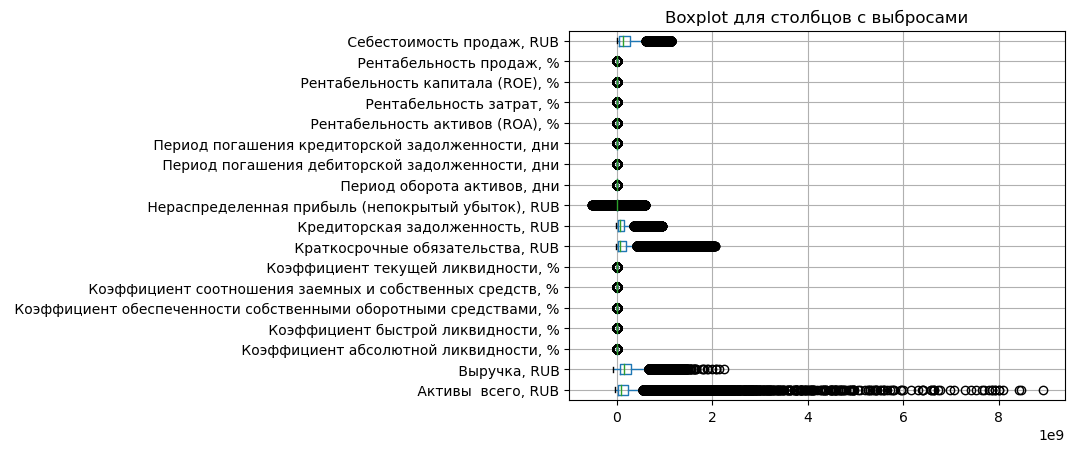

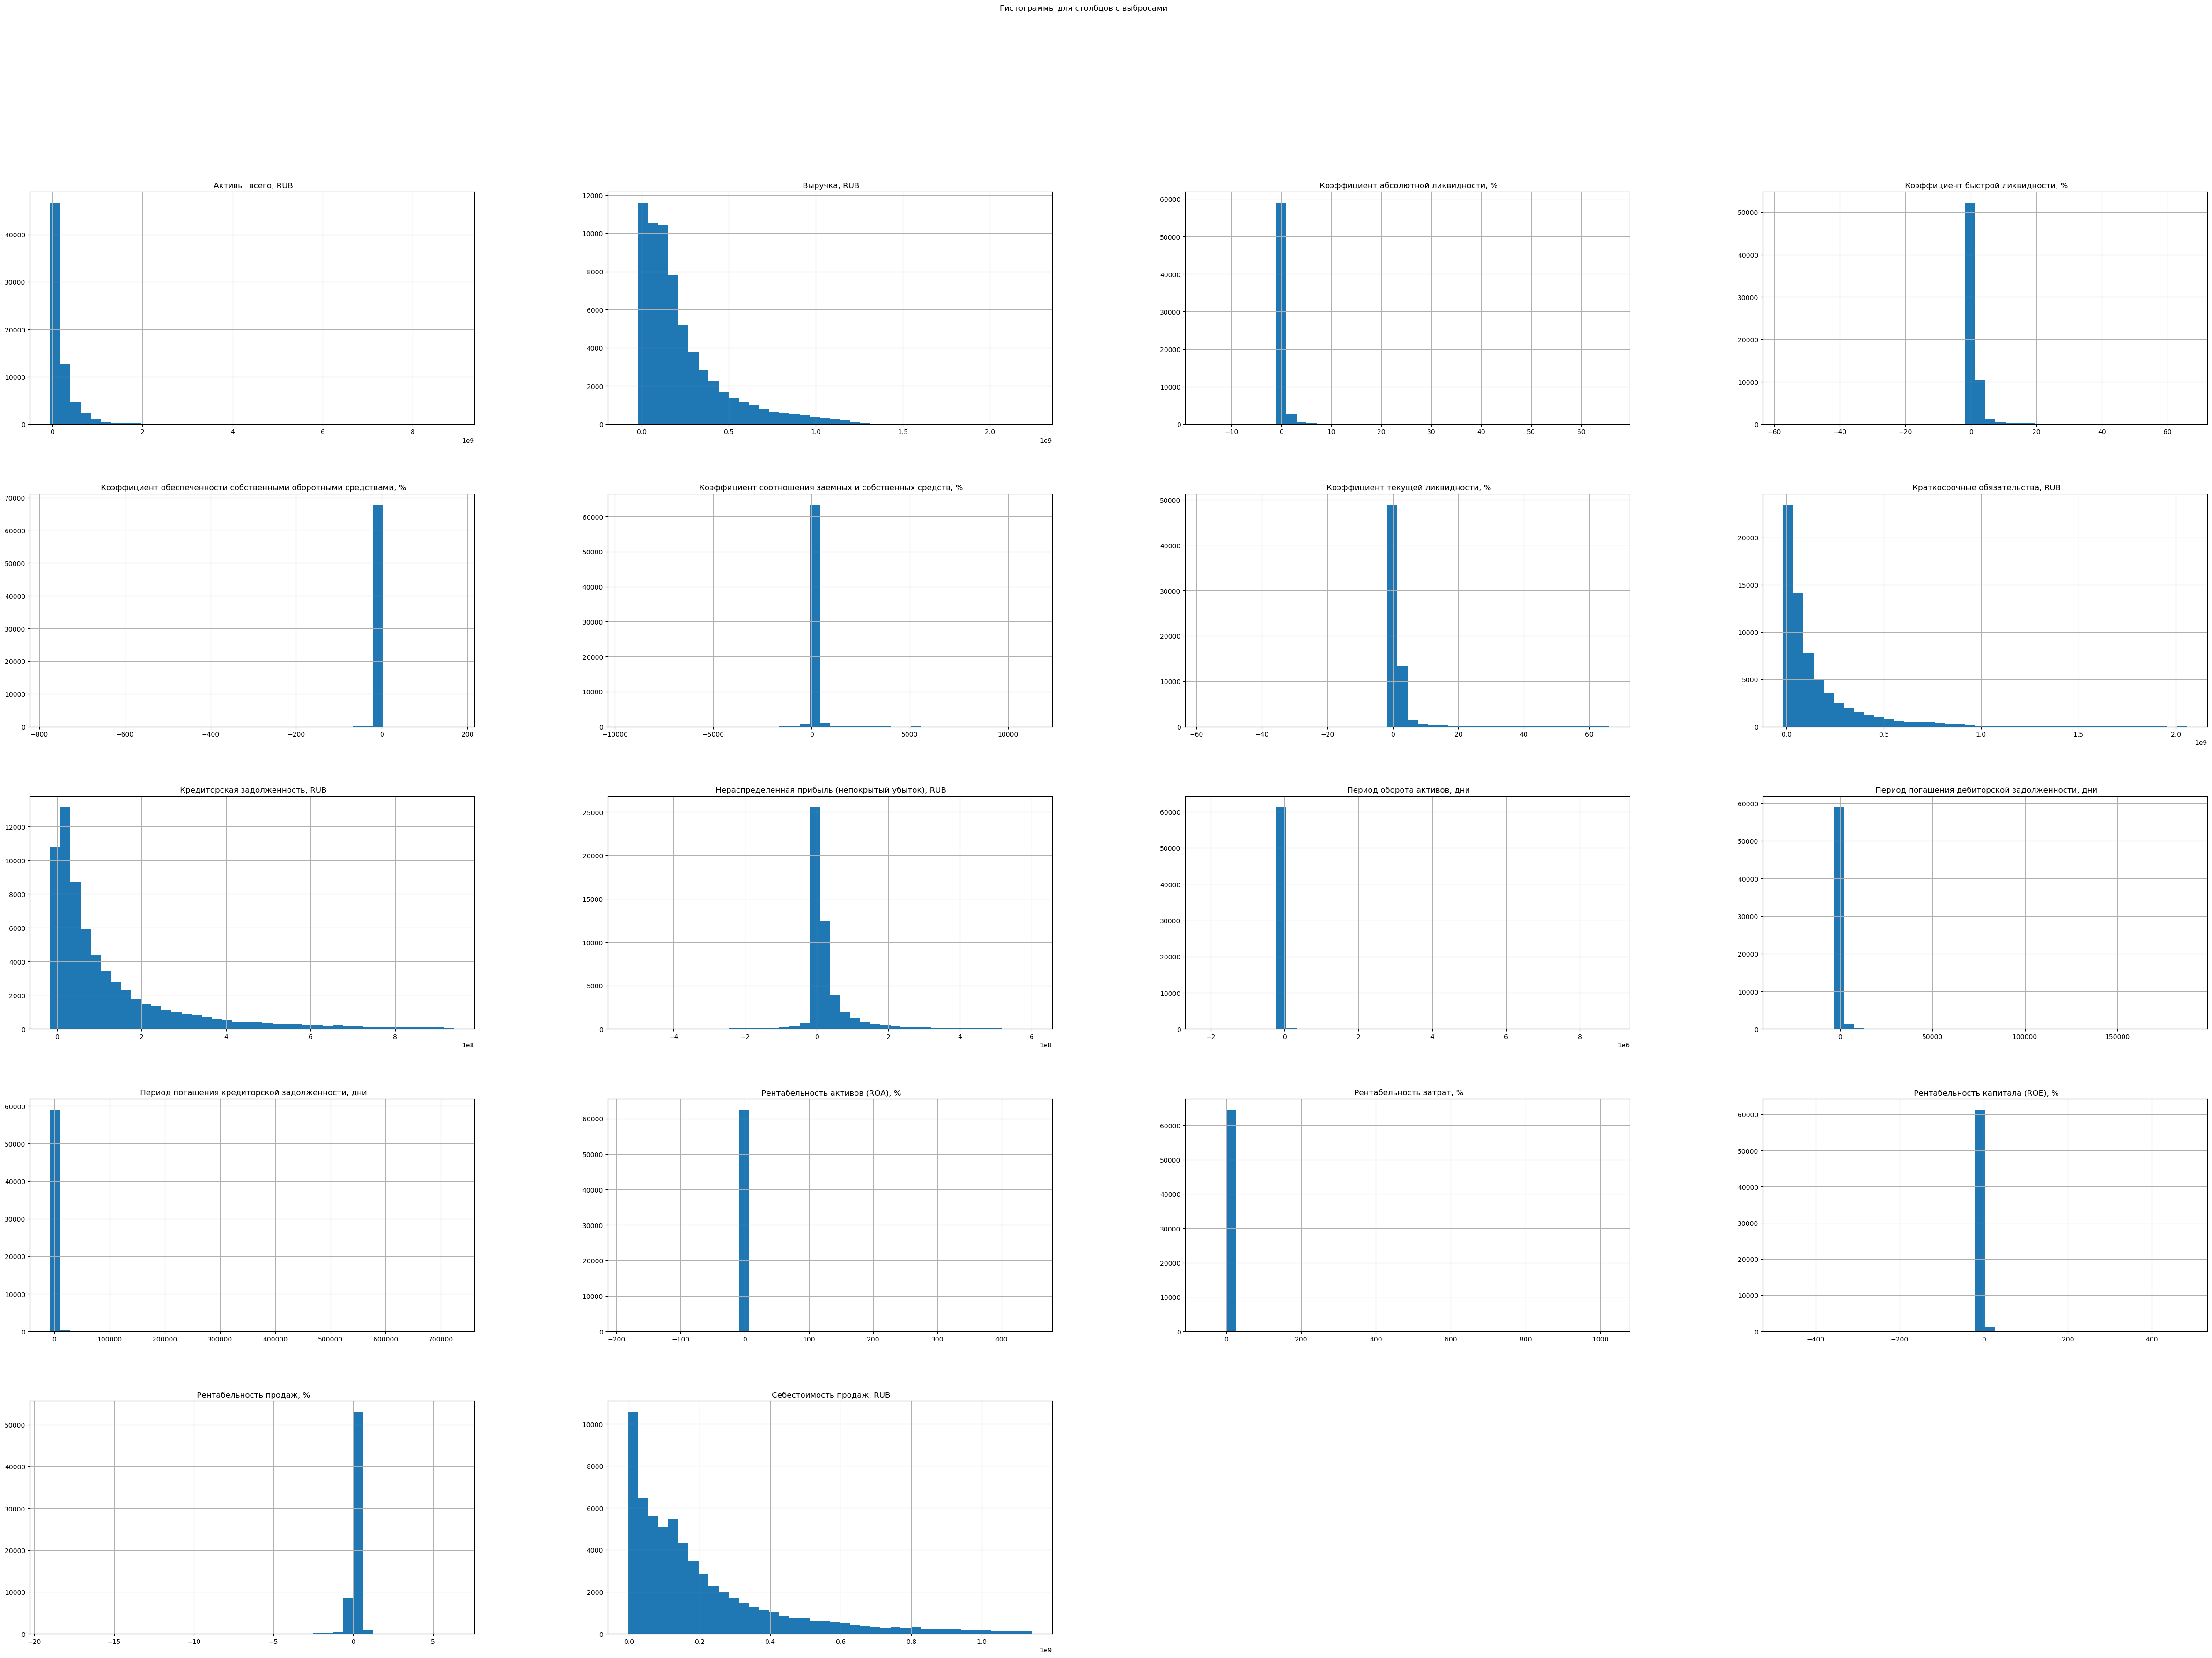

In [39]:
# Построение boxplot для каждого столбца
df.boxplot(column=int_regressor_columns, vert=False)
plt.title('Boxplot для столбцов с выбросами')
plt.show()

# Построение гистограммы для каждого столбца
df[int_regressor_columns].hist(bins=40, figsize=(60, 40))
plt.suptitle('Гистограммы для столбцов с выбросами')
plt.show()